In [85]:
from deep_neural_network_model import DNN
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow.keras.datasets import mnist

# Some functions to see the results of the model

In [86]:
def model_results(model, X_train, Y_train, X_test, Y_test):
    
    # Learning Phase
    print("GRADIENT DESCENT CHECK")
    plt.plot(model.cost_during_training)
    plt.title("Cross Entropy Cost Value During Training")
    plt.xlabel("Iteration")
    plt.ylabel("Cross Entropy Cost")
    plt.show()
    
    # Accuracy and ROC on Train data
    print("\nTRAINING METRICS")
    train_preds = model.predict(X_train)
    train_pred_labels = train_preds > 0.5
    train_accuracy = np.sum(train_pred_labels == Y_train) / Y_train.shape[1]
    print(f"Train Accuracy: {train_accuracy}")
    train_roc_auc_score = metrics.roc_auc_score(Y_train.T, train_preds.T)
    print(f"Train ROC AUC SCORE: {train_roc_auc_score}")

    # Accuracy and ROC on Test data
    print("\nTEST METRICS")
    test_preds = model.predict(X_test)
    test_pred_labels = test_preds > 0.5
    test_accuracy = np.sum(test_pred_labels == Y_test) / Y_test.shape[1]
    print(f"Test Accuracy: {test_accuracy}")
    test_roc_auc_score = metrics.roc_auc_score(Y_test.T, test_preds.T)
    print(f"Test ROC AUC SCORE: {test_roc_auc_score}")    

# IRIS Dataset test

In [87]:
iris = datasets.load_iris()

X = np.array(iris.data[:100])
Y = np.array(iris.target[:100])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test = X_test.T
Y_test = Y_test.reshape(1,len(Y_test))

In [88]:
print(X_train.shape)
print(X_test.shape)

(4, 80)
(4, 20)


In [89]:
model = DNN()
model.train(X_train=X_train, Y_train=Y_train, layer_dims=[5,4,1])

GRADIENT DESCENT CHECK


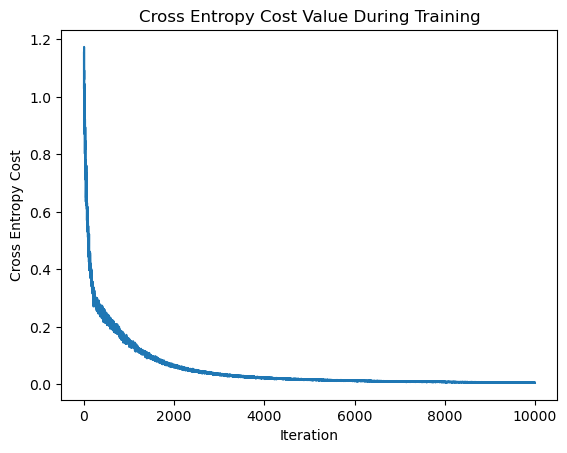


TRAINING METRICS
Train Accuracy: 1.0
Train ROC AUC SCORE: 1.0

TEST METRICS
Test Accuracy: 1.0
Test ROC AUC SCORE: 1.0


In [90]:
model_results(model, X_train, Y_train, X_test, Y_test)

Model predicts perfectly on iris test dataset

# Breast Cancer Data

In [91]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data For Better Training and also for avoiding Zero Division Errors in the beggining of learning
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(30, 455) and (1, 455)
(30, 114) and (1, 114)


In [92]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[50, 40, 30, 10, 1], epoch=10_000)

GRADIENT DESCENT CHECK


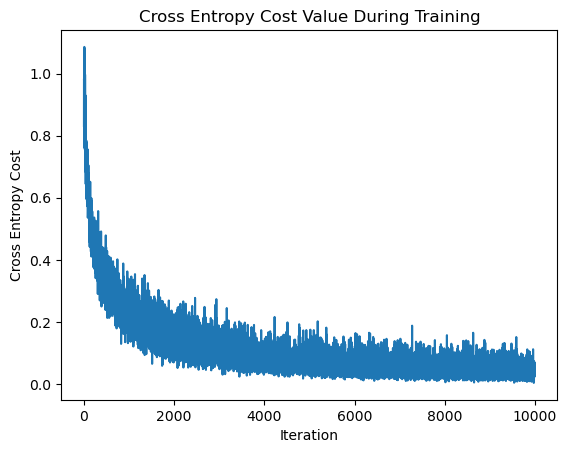


TRAINING METRICS
Train Accuracy: 0.9912087912087912
Train ROC AUC SCORE: 0.9986345015930814

TEST METRICS
Test Accuracy: 0.9824561403508771
Test ROC AUC SCORE: 0.9993449066491975


In [93]:
model_results(model, X_train_std, Y_train, X_test_std, Y_test)

Our network also performs well on Breast Cancer Test Dataset

# CIFAR-10 Dataset Test

In [94]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

indices_0_1_train = np.where((Y_train == 0) | (Y_train == 1))
indices_0_1_test = np.where((Y_test == 0) | (Y_test == 1))

X_train = X_train[indices_0_1_train]
Y_train = Y_train[indices_0_1_train]

X_test = X_test[indices_0_1_test]
Y_test = Y_test[indices_0_1_test]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Standardize Pixel values
X_train_std = X_train / 255.0
X_test_std  = X_test / 255.0

X_train_std = X_train_std.T
Y_train = Y_train.reshape(1,len(Y_train))
X_test_std = X_test_std.T
Y_test = Y_test.reshape(1,len(Y_test))

print(f"{X_train_std.shape} and {Y_train.shape}")
print(f"{X_test_std.shape} and {Y_test.shape}")

(784, 12665) and (1, 12665)
(784, 2115) and (1, 2115)


In [95]:
model = DNN()
model.train(X_train=X_train_std, Y_train=Y_train, layer_dims=[785, 500, 100, 10, 1], epoch=1_000)

GRADIENT DESCENT CHECK


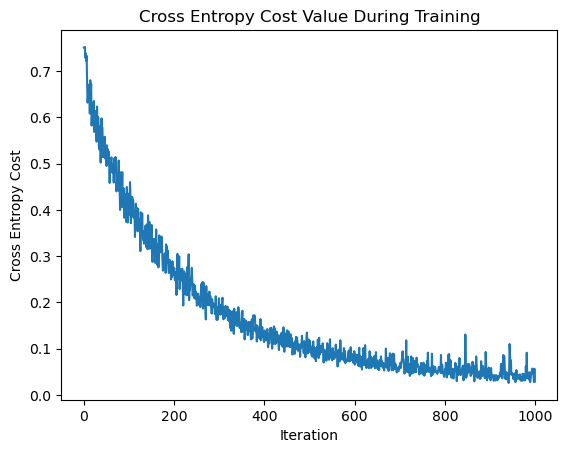


TRAINING METRICS
Train Accuracy: 0.9958941966048164
Train ROC AUC SCORE: 0.999887260784137

TEST METRICS
Test Accuracy: 0.9981087470449173
Test ROC AUC SCORE: 0.9999703317450328


In [97]:
model_results(model, X_train_std, Y_train, X_test_std, Y_test)

The model also works well on image datasets